In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
from collections import OrderedDict
from functools import partial
from random import shuffle
import matplotlib.pyplot as plt
import os
import re
from keras.models import Model, load_model
from tensorflow.keras import Model, Input, regularizers, utils
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import string
import json
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from tqdm import tqdm

In [3]:
from keras.applications.vgg19 import VGG19
# model = VGG19()
model = VGG19(weights="imagenet",input_shape=(224,224,3))
print(model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
model.layers[12].output

<KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv1')>

In [5]:
model_new = Model(model.input, model.layers[12].output)

In [6]:
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
import glob
face_images = glob.glob('E:/Download/AniGAN-main/face2anime/human-faces/' + "*.*")
anime_images = glob.glob('E:/Download/AniGAN-main/face2anime/anime-faces/' + "*.*")

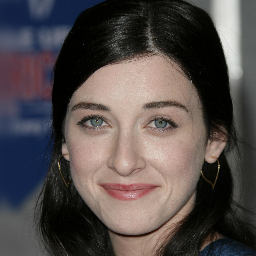

In [8]:
from tensorflow.keras import Model, Input, regularizers, utils
img_human = utils.load_img(face_images[0])
img_human

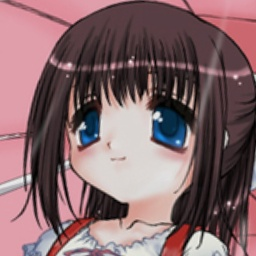

In [9]:
img_anime = utils.load_img(anime_images[0])
img_anime

In [10]:
all_images_anime = []
all_images_human = []

for i in tqdm(face_images):
    img = utils.load_img(i, target_size=(224,224,3))
    img = utils.img_to_array(img)
    img = img/255.0
    
#     print("Before - ", img.shape)
    img = np.expand_dims(img,axis=0)
#     print("After - ", img.shape)
    
    all_images_human.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 167.03it/s]


In [11]:
for i in tqdm(anime_images):
    img = utils.load_img(i, target_size=(224,224,3))
    img = utils.img_to_array(img)
    img = img/255.0
    
#     print("Before - ", img.shape)
    img = np.expand_dims(img,axis=0)
#     print("After - ", img.shape)
    all_images_anime.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.45it/s]


In [12]:
def encode_image(img):
    feature_vector = model_new.predict(img)
#     feature_vector = feature_vector.reshape((-1,))
    return feature_vector

In [13]:
start_time = time()
encoding_human ={}

for ix,img in enumerate(all_images_human):
    encoding_human[ix] = encode_image(img)
    print("Encoding in Progress Time step %d "%ix)

end_time = time()
print("Total Time Taken :",end_time-start_time)

1/1 [==============================] - 0s 192ms/step
Encoding in Progress Time step 0 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 1 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 2 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 3 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 4 
1/1 [==============================] - 0s 78ms/step
Encoding in Progress Time step 5 
1/1 [==============================] - 0s 78ms/step
Encoding in Progress Time step 6 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 7 
1/1 [==============================] - 0s 82ms/step
Encoding in Progress Time step 8 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 9 
1/1 [==============================] - 0s 85ms/step
Encoding in Progress Time step 10 
1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 94 
1/1 [==============================] - 0s 78ms/step
Encoding in Progress Time step 95 
1/1 [==============================] - 0s 81ms/step
Encoding in Progress Time step 96 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 97 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 98 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 99 
Total Time Taken : 10.538025140762329


In [14]:
!mkdir saved

A subdirectory or file saved already exists.


In [15]:
with open("saved/encoded_human_features.pkl","wb") as f:
    pickle.dump(encoding_human,f)

In [16]:
start_time = time()
encoding_anime ={}

for ix,img in enumerate(all_images_anime):
    encoding_anime[ix] = encode_image(img)
    print("Encoding in Progress Time step %d "%ix)

end_time = time()
print("Total Time Taken :",end_time-start_time)

1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 0 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 1 
1/1 [==============================] - 0s 78ms/step
Encoding in Progress Time step 2 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 3 
1/1 [==============================] - 0s 81ms/step
Encoding in Progress Time step 4 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 5 
1/1 [==============================] - 0s 78ms/step
Encoding in Progress Time step 6 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 7 
1/1 [==============================] - 0s 78ms/step
Encoding in Progress Time step 8 
1/1 [==============================] - 0s 77ms/step
Encoding in Progress Time step 9 
1/1 [==============================] - 0s 78ms/step
Encoding in Progress Time step 10 
1/1 [==============================] - 0s 79ms/step
E

1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 94 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 95 
1/1 [==============================] - 0s 81ms/step
Encoding in Progress Time step 96 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 97 
1/1 [==============================] - 0s 79ms/step
Encoding in Progress Time step 98 
1/1 [==============================] - 0s 80ms/step
Encoding in Progress Time step 99 
Total Time Taken : 10.281441688537598


In [17]:
with open("saved/encoded_anime_features.pkl","wb") as f:
    pickle.dump(encoding_anime,f)

In [18]:
print(encoding_anime[0])
print(encoding_anime[0].shape)

[[[[ 0.        14.798872   0.        ...  0.         9.651168
     0.       ]
   [ 0.        27.7459     8.123304  ...  0.         7.3848796
     0.       ]
   [12.931753  36.33536   15.783932  ...  0.        11.888419
     0.       ]
   ...
   [ 9.15686   27.560736  11.734443  ...  0.         8.319649
     0.       ]
   [15.905256  23.456383   0.        ...  0.         9.31785
     0.       ]
   [18.497946  16.825985  14.081259  ...  0.        13.493015
     0.       ]]

  [[18.306839  15.617424   0.        ...  0.        12.984396
     0.       ]
   [ 0.        30.249598  33.19456   ...  0.         7.791607
     0.       ]
   [10.446434  40.81457   44.98295   ...  0.         7.230574
     0.       ]
   ...
   [ 0.        44.18025   37.061462  ...  0.        18.666754
     0.       ]
   [ 0.        42.65804   28.388031  ...  0.        19.120424
     0.       ]
   [23.66988   33.68049   40.756958  ...  0.        21.087057
     0.       ]]

  [[28.724642  16.365015   0.        ...  0.  

In [19]:
def get_mean_std(x, epsilon=1e-5):

    # Compute the mean and standard deviation of a tensor.
    mean = np.mean(x)
    standard_deviation = np.std(x)
    return mean, standard_deviation

In [20]:
def ada_in(style, content):
    """Computes the AdaIn feature map.

    Args:
        style: The style feature map.
        content: The content feature map.

    Returns:
        The AdaIN feature map.
    """
    content_mean, content_std = get_mean_std(content)
    style_mean, style_std = get_mean_std(style)
    t = style_std * (content - content_mean) / content_std + style_mean
    return t

In [21]:
#example
res = ada_in(encoding_anime[0], encoding_human[0])
# print(res)
print(res.shape)
print(res[0].shape)

(1, 28, 28, 512)
(28, 28, 512)


In [22]:
#decoder part

In [23]:
x0 = Input(shape = (28, 28, 512))
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x0)
x2 = UpSampling2D((2, 2))(x1)

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(256, (3, 3), activation='relu', padding='same')(x4)
x6 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)
x7 = UpSampling2D((2, 2))(x6)

x8 = Conv2D(128, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(64, (3, 3), activation='relu', padding='same')(x8)
x10 = UpSampling2D((2, 2))(x9)

x11 = Conv2D(64, (3, 3), activation='relu', padding='same')(x10)
x12 = Conv2D(3, (3, 3), activation='relu', padding='same')(x11)

In [24]:
decoder = Model(x0, x12)
decoder.compile(optimizer='adam', loss='mse')
decoder

In [25]:
print(decoder.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 512)]     0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 256)       1179904   
                                                                 
 up_sampling2d (UpSampling2D  (None, 56, 56, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 256)       590080    
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       590080    
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 256)       590080    
                                                           

In [32]:
predictions = decoder.predict(res)

1/1 [==============================] - 0s 144ms/step


In [27]:
start_time = time()
encoding_combined = {}

for ix,img in enumerate(encoding_anime):
    encoding_combined[ix] = ada_in(encoding_anime[ix], encoding_human[ix])
    print("Encoding in Progress Time step %d "%ix)

end_time = time()
print("Total Time Taken :",end_time-start_time)

Encoding in Progress Time step 0 
Encoding in Progress Time step 1 
Encoding in Progress Time step 2 
Encoding in Progress Time step 3 
Encoding in Progress Time step 4 
Encoding in Progress Time step 5 
Encoding in Progress Time step 6 
Encoding in Progress Time step 7 
Encoding in Progress Time step 8 
Encoding in Progress Time step 9 
Encoding in Progress Time step 10 
Encoding in Progress Time step 11 
Encoding in Progress Time step 12 
Encoding in Progress Time step 13 
Encoding in Progress Time step 14 
Encoding in Progress Time step 15 
Encoding in Progress Time step 16 
Encoding in Progress Time step 17 
Encoding in Progress Time step 18 
Encoding in Progress Time step 19 
Encoding in Progress Time step 20 
Encoding in Progress Time step 21 
Encoding in Progress Time step 22 
Encoding in Progress Time step 23 
Encoding in Progress Time step 24 
Encoding in Progress Time step 25 
Encoding in Progress Time step 26 
Encoding in Progress Time step 27 
Encoding in Progress Time step

In [40]:
encoding_list = list(encoding_combined.values())
desired_ans = []
for i in tqdm(all_images_anime):
    desired_ans.append(i[0])
#     print(i.shape)
#     print(i[0].shape)

desired_ans[0].shape
all_images_anime[0].shape

100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


(1, 224, 224, 3)

In [29]:
print(len(encoding_list))
print(len(desired_ans))
encoding_list[0].shape

100
100


(1, 28, 28, 512)

In [43]:
#Problem in this part.
#unable to fit somehow....
# we are directly predicting the results without fitting the data...
# as a result the results are random images.

# d_e = decoder.fit(encoding_list, all_images_anime)

In [44]:
predictions = []
for i in tqdm(encoding_list):
    predictions.append(decoder.predict(i))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 88ms/step


  1%|▊                                                                                 | 1/100 [00:00<00:11,  8.59it/s]

1/1 [==============================] - 0s 86ms/step


  2%|█▋                                                                                | 2/100 [00:00<00:11,  8.86it/s]

1/1 [==============================] - 0s 88ms/step


  3%|██▍                                                                               | 3/100 [00:00<00:10,  8.87it/s]

1/1 [==============================] - 0s 90ms/step


  4%|███▎                                                                              | 4/100 [00:00<00:10,  8.83it/s]

1/1 [==============================] - 0s 87ms/step


  5%|████                                                                              | 5/100 [00:00<00:10,  8.88it/s]

1/1 [==============================] - 0s 89ms/step


  6%|████▉                                                                             | 6/100 [00:00<00:10,  8.91it/s]

1/1 [==============================] - 0s 89ms/step


  7%|█████▋                                                                            | 7/100 [00:00<00:10,  8.88it/s]

1/1 [==============================] - 0s 85ms/step


  8%|██████▌                                                                           | 8/100 [00:00<00:10,  9.01it/s]

1/1 [==============================] - 0s 87ms/step


  9%|███████▍                                                                          | 9/100 [00:01<00:10,  8.99it/s]

1/1 [==============================] - 0s 87ms/step


 10%|████████                                                                         | 10/100 [00:01<00:10,  8.96it/s]

1/1 [==============================] - 0s 89ms/step


 11%|████████▉                                                                        | 11/100 [00:01<00:09,  8.91it/s]

1/1 [==============================] - 0s 86ms/step


 12%|█████████▋                                                                       | 12/100 [00:01<00:09,  8.90it/s]

1/1 [==============================] - 0s 88ms/step


 13%|██████████▌                                                                      | 13/100 [00:01<00:09,  8.97it/s]

1/1 [==============================] - 0s 90ms/step


 14%|███████████▎                                                                     | 14/100 [00:01<00:09,  8.97it/s]

1/1 [==============================] - 0s 88ms/step


 15%|████████████▏                                                                    | 15/100 [00:01<00:09,  9.02it/s]

1/1 [==============================] - 0s 88ms/step


 16%|████████████▉                                                                    | 16/100 [00:01<00:09,  9.05it/s]

1/1 [==============================] - 0s 87ms/step


 17%|█████████████▊                                                                   | 17/100 [00:01<00:09,  9.06it/s]

1/1 [==============================] - 0s 97ms/step


 18%|██████████████▌                                                                  | 18/100 [00:02<00:09,  8.73it/s]

1/1 [==============================] - 0s 89ms/step


 19%|███████████████▍                                                                 | 19/100 [00:02<00:09,  8.80it/s]

1/1 [==============================] - 0s 88ms/step


 20%|████████████████▏                                                                | 20/100 [00:02<00:09,  8.87it/s]

1/1 [==============================] - 0s 90ms/step


 21%|█████████████████                                                                | 21/100 [00:02<00:08,  8.87it/s]

1/1 [==============================] - 0s 86ms/step


 22%|█████████████████▊                                                               | 22/100 [00:02<00:08,  8.85it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██████████████████▋                                                              | 23/100 [00:02<00:12,  6.37it/s]

1/1 [==============================] - 0s 95ms/step


 24%|███████████████████▍                                                             | 24/100 [00:02<00:11,  6.78it/s]

1/1 [==============================] - 0s 95ms/step


 25%|████████████████████▎                                                            | 25/100 [00:02<00:10,  7.16it/s]

1/1 [==============================] - 0s 100ms/step


 26%|█████████████████████                                                            | 26/100 [00:03<00:10,  7.39it/s]

1/1 [==============================] - 0s 98ms/step


 27%|█████████████████████▊                                                           | 27/100 [00:03<00:09,  7.47it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██████████████████████▋                                                          | 28/100 [00:03<00:09,  7.60it/s]

1/1 [==============================] - 0s 96ms/step


 29%|███████████████████████▍                                                         | 29/100 [00:03<00:09,  7.74it/s]

1/1 [==============================] - 0s 91ms/step


 30%|████████████████████████▎                                                        | 30/100 [00:03<00:08,  8.03it/s]

1/1 [==============================] - 0s 90ms/step


 31%|█████████████████████████                                                        | 31/100 [00:03<00:08,  8.29it/s]

1/1 [==============================] - 0s 94ms/step


 32%|█████████████████████████▉                                                       | 32/100 [00:03<00:08,  8.29it/s]

1/1 [==============================] - 0s 93ms/step


 33%|██████████████████████████▋                                                      | 33/100 [00:03<00:07,  8.40it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███████████████████████████▌                                                     | 34/100 [00:04<00:07,  8.52it/s]

1/1 [==============================] - 0s 88ms/step


 35%|████████████████████████████▎                                                    | 35/100 [00:04<00:07,  8.69it/s]

1/1 [==============================] - 0s 89ms/step


 36%|█████████████████████████████▏                                                   | 36/100 [00:04<00:07,  8.80it/s]

1/1 [==============================] - 0s 90ms/step


 37%|█████████████████████████████▉                                                   | 37/100 [00:04<00:07,  8.83it/s]

1/1 [==============================] - 0s 90ms/step


 38%|██████████████████████████████▊                                                  | 38/100 [00:04<00:07,  8.81it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███████████████████████████████▌                                                 | 39/100 [00:04<00:06,  8.72it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████████████████████████████████▍                                                | 40/100 [00:04<00:06,  8.84it/s]

1/1 [==============================] - 0s 90ms/step


 41%|█████████████████████████████████▏                                               | 41/100 [00:04<00:06,  8.83it/s]

1/1 [==============================] - 0s 97ms/step


 42%|██████████████████████████████████                                               | 42/100 [00:04<00:06,  8.55it/s]

1/1 [==============================] - 0s 102ms/step


 43%|██████████████████████████████████▊                                              | 43/100 [00:05<00:06,  8.39it/s]

1/1 [==============================] - 0s 104ms/step


 44%|███████████████████████████████████▋                                             | 44/100 [00:05<00:06,  8.25it/s]

1/1 [==============================] - 0s 104ms/step


 45%|████████████████████████████████████▍                                            | 45/100 [00:05<00:06,  8.13it/s]

1/1 [==============================] - 0s 100ms/step


 46%|█████████████████████████████████████▎                                           | 46/100 [00:05<00:06,  8.14it/s]

1/1 [==============================] - 0s 97ms/step


 47%|██████████████████████████████████████                                           | 47/100 [00:05<00:06,  8.17it/s]

1/1 [==============================] - 0s 91ms/step


 48%|██████████████████████████████████████▉                                          | 48/100 [00:05<00:06,  8.36it/s]

1/1 [==============================] - 0s 97ms/step


 49%|███████████████████████████████████████▋                                         | 49/100 [00:05<00:06,  8.35it/s]

1/1 [==============================] - 0s 92ms/step


 50%|████████████████████████████████████████▌                                        | 50/100 [00:05<00:05,  8.48it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:06<00:05,  8.51it/s]

1/1 [==============================] - 0s 98ms/step


 52%|██████████████████████████████████████████                                       | 52/100 [00:06<00:05,  8.45it/s]

1/1 [==============================] - 0s 91ms/step


 53%|██████████████████████████████████████████▉                                      | 53/100 [00:06<00:05,  8.55it/s]

1/1 [==============================] - 0s 99ms/step


 54%|███████████████████████████████████████████▋                                     | 54/100 [00:06<00:05,  8.43it/s]

1/1 [==============================] - 0s 90ms/step


 55%|████████████████████████████████████████████▌                                    | 55/100 [00:06<00:05,  8.53it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:06<00:05,  8.46it/s]

1/1 [==============================] - 0s 95ms/step


 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:06<00:05,  8.49it/s]

1/1 [==============================] - 0s 94ms/step


 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:06<00:04,  8.49it/s]

1/1 [==============================] - 0s 93ms/step


 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:06<00:04,  8.48it/s]

1/1 [==============================] - 0s 95ms/step


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:07<00:04,  8.48it/s]

1/1 [==============================] - 0s 97ms/step


 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:07<00:04,  8.34it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:07<00:04,  8.49it/s]

1/1 [==============================] - 0s 95ms/step


 63%|███████████████████████████████████████████████████                              | 63/100 [00:07<00:04,  8.50it/s]

1/1 [==============================] - 0s 93ms/step


 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:07<00:04,  8.53it/s]

1/1 [==============================] - 0s 106ms/step


 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:07<00:04,  8.22it/s]

1/1 [==============================] - 0s 94ms/step


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:07<00:04,  8.33it/s]

1/1 [==============================] - 0s 95ms/step


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:07<00:03,  8.38it/s]

1/1 [==============================] - 0s 100ms/step


 68%|███████████████████████████████████████████████████████                          | 68/100 [00:08<00:03,  8.31it/s]

1/1 [==============================] - 0s 104ms/step


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:08<00:03,  8.21it/s]

1/1 [==============================] - 0s 103ms/step


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:08<00:03,  8.03it/s]

1/1 [==============================] - 0s 93ms/step


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:08<00:03,  8.21it/s]

1/1 [==============================] - 0s 99ms/step


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:08<00:03,  8.19it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:08<00:03,  8.15it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [00:08<00:03,  8.28it/s]

1/1 [==============================] - 0s 98ms/step


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:08<00:03,  8.27it/s]

1/1 [==============================] - 0s 96ms/step


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:09<00:02,  8.32it/s]

1/1 [==============================] - 0s 100ms/step


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [00:09<00:02,  8.25it/s]

1/1 [==============================] - 0s 94ms/step


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:09<00:02,  8.33it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [00:09<00:02,  8.47it/s]

1/1 [==============================] - 0s 102ms/step


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:09<00:02,  8.15it/s]

1/1 [==============================] - 0s 107ms/step


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:09<00:02,  7.97it/s]

1/1 [==============================] - 0s 106ms/step


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:09<00:02,  7.89it/s]

1/1 [==============================] - 0s 104ms/step


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [00:09<00:02,  7.89it/s]

1/1 [==============================] - 0s 105ms/step


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:10<00:02,  7.84it/s]

1/1 [==============================] - 0s 100ms/step


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [00:10<00:01,  7.90it/s]

1/1 [==============================] - 0s 103ms/step


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [00:10<00:01,  7.91it/s]

1/1 [==============================] - 0s 95ms/step


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [00:10<00:01,  8.06it/s]

1/1 [==============================] - 0s 105ms/step


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:10<00:01,  7.99it/s]

1/1 [==============================] - 0s 106ms/step


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [00:10<00:01,  7.90it/s]

1/1 [==============================] - 0s 102ms/step


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:10<00:01,  7.89it/s]

1/1 [==============================] - 0s 105ms/step


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:10<00:01,  7.84it/s]

1/1 [==============================] - 0s 97ms/step


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [00:11<00:01,  7.99it/s]

1/1 [==============================] - 0s 106ms/step


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:11<00:00,  7.97it/s]

1/1 [==============================] - 0s 96ms/step


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:11<00:00,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:11<00:00,  8.08it/s]

1/1 [==============================] - 0s 96ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:11<00:00,  8.18it/s]

1/1 [==============================] - 0s 107ms/step


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:11<00:00,  8.02it/s]

1/1 [==============================] - 0s 107ms/step


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [00:11<00:00,  7.95it/s]

1/1 [==============================] - 0s 102ms/step


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:11<00:00,  7.87it/s]

1/1 [==============================] - 0s 103ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.29it/s]


In [45]:
print(len(predictions))
print(predictions[0].shape)

100
(1, 224, 224, 3)


In [46]:
print(len(all_images_anime))
print(all_images_anime[0].shape)

100
(1, 224, 224, 3)


(224, 224, 3)


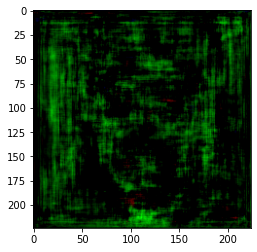

In [58]:
utils.load_img(anime_images[3])
utils.face_image(anime_image[3])
tmp = predictions[0][0]*255.0
print(tmp.shape)
img = utils.array_to_img(tmp)
plt.imshow(img)